## Observations and Insights 

In [ ]:
#Observations
# Capomulin and Ramicane have the lowest tumor volume average and also the lower SD
# Capomulin data doesn't have any outliers, so we can trust the statistic results
# From the analysis done in mouse s185 we see there is a negative correlation between timepoint and tumor volume 
# On the other hand, there is a positive correlation between mouse weight and tumor volume

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/marinaduarte/Documents/nu-chi-data-pt-09-2020-u-c/05-Matplotlib/HW/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/marinaduarte/Documents/nu-chi-data-pt-09-2020-u-c/05-Matplotlib/HW/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
finalDF = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
finalDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_of_mice = finalDF['Mouse ID'].nunique(dropna=True)
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_testDF = finalDF.copy()
duplicateMice = duplicate_testDF[duplicate_testDF.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateMice['Mouse ID'])

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMice2 = finalDF.loc[finalDF['Mouse ID'] == 'g989']
duplicateMice2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#uniqueDF = finalDF.drop_duplicates(['Mouse ID','Timepoint'], keep='first')
uniqueDF = finalDF.loc[finalDF['Mouse ID'] != 'g989']
uniqueDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
number_of_mice1 = uniqueDF['Mouse ID'].nunique(dropna=True)
number_of_mice1

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats = uniqueDF.groupby(['Drug Regimen'])
mean = summary_stats['Tumor Volume (mm3)'].mean()
median = summary_stats['Tumor Volume (mm3)'].median()
variance = summary_stats['Tumor Volume (mm3)'].var()
st = summary_stats['Tumor Volume (mm3)'].std()
sem = summary_stats['Tumor Volume (mm3)'].sem()
summary_stats_final = pd.DataFrame({'Mean': mean,
                                  'Median': median,
                                   'Variance': variance,
                                   'Standar Deviation': st,
                                   'SEM': sem})
summary_stats_final

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
one_line = summary_stats_final.agg("mean")
one_line

Mean                 50.975982
Median               49.902123
Variance             47.858440
Standar Deviation     6.821103
SEM                   0.502785
dtype: float64

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of mice testes on each drug')

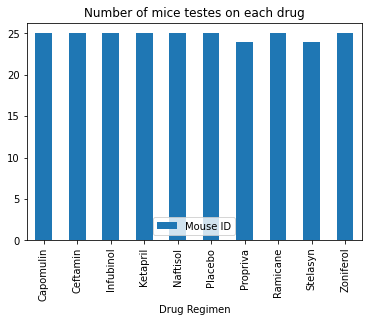

In [76]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

uniquemice_drug = uniqueDF.copy()
uniquemice_drug = uniquemice_drug.drop_duplicates(['Mouse ID'])
uniquemice_drug = uniquemice_drug.groupby(['Drug Regimen'])[['Mouse ID']].count()
uniquemice_drug.plot.bar()
plt.title('Number of mice testes on each drug')
#uniquemice_drug


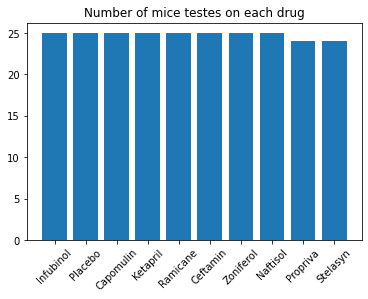

In [73]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
uniquemice_drugPY = uniqueDF.copy()
uniquemice_drugPY = uniquemice_drugPY.drop_duplicates(['Mouse ID'])
#uniquemice_drugPY
#uniquemice_drugPY.groupby(['Drug Regimen']).count()['Mouse ID']
micecount = uniquemice_drugPY['Drug Regimen'].value_counts()
#micecount
plt.bar(micecount.index.values, micecount.values)
#plt.bar(uniquemice_drugPY['Drug Regimen'],uniquemice_drugPY['Mouse ID'].count())
plt.title('Number of mice testes on each drug')
plt.xticks(rotation=45)
plt.show()

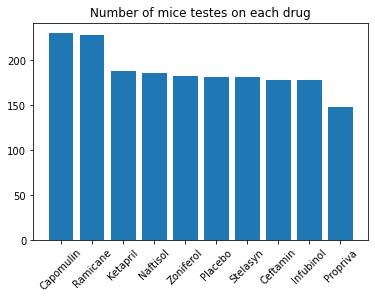

In [74]:
# Bar plot showing the total number of mice tested on each drug regimen using pyplot
micecount2 = uniqueDF['Drug Regimen'].value_counts()
#micecount2
plt.bar(micecount2.index.values, micecount2.values)
plt.title('Number of mice testes on each drug')
plt.xticks(rotation=45)
plt.show()

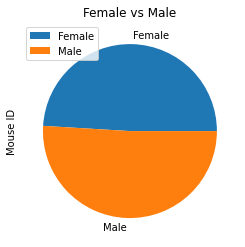

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
uniquemice_sex = uniqueDF.loc[:,['Mouse ID','Sex']]
#uniquemice_sex = uniquemice_sex.drop_duplicates(['Mouse ID'])
sexDF = uniquemice_sex.groupby(['Sex'])[['Mouse ID']].count()
#plt.pie(uniquemice_sex['Sex'])
#uniquemice_sex
sexDF.plot.pie(subplots=True)
plt.title('Female vs Male')
plt.legend(loc = 'upper left')
plt.show()

<ipython-input-92-36c8ebe2223a>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sexDF, labels = labels)


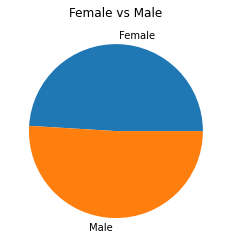

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
uniquemice_sex = uniqueDF.loc[:,['Mouse ID','Sex']]
#uniquemice_sex = uniquemice_sex.drop_duplicates(['Mouse ID'])
sexDF = uniquemice_sex.groupby(['Sex'])[['Mouse ID']].count()
#plt.pie(uniquemice_sex['Sex'])
#uniquemice_sex
labels = 'Female', 'Male'
plt.pie(sexDF, labels = labels)
plt.title('Female vs Male')

plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = uniqueDF.drop_duplicates(['Mouse ID'], keep='last')
last_timepoint = last_timepoint.loc[:,['Mouse ID','Timepoint']]
last_timepoint

,Mouse ID,Timepoint
9,k403,45
19,s185,45
29,x401,45
39,m601,45
49,g791,45
...,...,...
1859,z314,5
1862,z435,10
1872,z581,45
1882,z795,45


In [69]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_volume = pd.merge(last_timepoint,uniqueDF,how='left', on=['Mouse ID',"Timepoint"])

last_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,5,Stelasyn,Female,21,28,45.934712,0
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propiva','Ramicane','Stelasyn','Zoniferol']
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for x in treatments:
    drug_vol = last_volume.loc[last_volume["Drug Regimen"]== x]["Tumor Volume (mm3)"]
    tumor_vol_data.append(drug_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
#print(f"The lower quartile of Tumor Volume is: {lowerq}")
#print(f"The upper quartile of Tumor Volume is: {upperq}")
#print(f"The interquartile range of Tumor Volume is: {iqr}")
#print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")

    outliers = drug_vol.loc[(drug_vol < lower_bound) | (drug_vol > upper_bound)]
    print(x, outliers)


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)


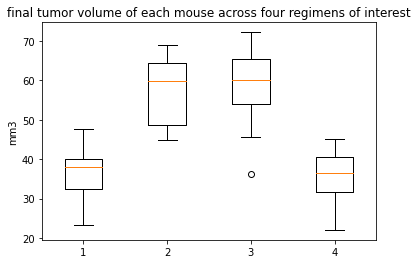

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume of each mouse across four regimens of interest')
ax1.set_ylabel('mm3')
ax1.boxplot(tumor_vol_data)
plt.show()

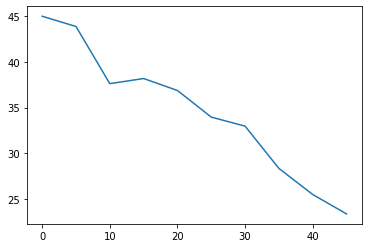

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
CapomulinDF = uniqueDF.loc[(uniqueDF['Drug Regimen']== 'Capomulin')&(uniqueDF['Mouse ID']== 's185')]
plt.plot(CapomulinDF['Timepoint'],CapomulinDF['Tumor Volume (mm3)'])

Text(0, 0.5, 'Tumor Volume (mm3)')

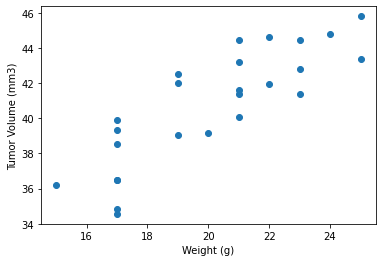

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CapomulinDF2 = uniqueDF.loc[(uniqueDF['Drug Regimen']== 'Capomulin')]
#Capomulin_weight = CapomulinDF2.groupby(['Weight (g)'])[['Tumor Volume (mm3)']].mean()
Capaverage = CapomulinDF2.groupby(['Mouse ID']).mean()

#Capaverage
plt.scatter(Capaverage['Weight (g)'],Capaverage['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#weight = Capaverage.iloc[:,4]
#averageTV = Capaverage.iloc[:,8]
correlation = round(st.pearsonr(Capaverage['Weight (g)'],Capaverage['Tumor Volume (mm3)'])[0],2)
#print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")
#print(f"The linear regression between mouse weight and average tumor volume is {linregress(weight,averageTV)}")

correlation

AttributeError: 'Series' object has no attribute 'pearsonr'